In [1]:
import plotly.express as px
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib as mp
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import pearsonr
colors=['#BC5308', '#FFECD1', '#C5CAB8', '#FF7D00', '#8AA79F', '#FFB569', '#15616D', '#001524']
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Hr_24.csv")

In [3]:
df.head(3)
df = df.drop(columns = ["Unnamed: 0"])

In [4]:
x = df.drop("employment_status", axis=1)
y = df["employment_status"]

In [5]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11167 entries, 0 to 11166
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   satisfaction_level        11167 non-null  float64
 1   last_evaluation_score     11167 non-null  float64
 2   project_count             11167 non-null  int64  
 3   average_monthly_hours     11167 non-null  int64  
 4   years_of_working          11167 non-null  int64  
 5   workplace_accident_count  11167 non-null  int64  
 6   promotion_last_5years     11167 non-null  int64  
 7   department                11167 non-null  object 
 8   salary_range              11167 non-null  object 
 9   satisfaction_groups       11167 non-null  object 
 10  Difference_in_scores      11167 non-null  float64
 11  difference_groups         11167 non-null  object 
dtypes: float64(3), int64(5), object(4)
memory usage: 1.0+ MB


## Tranforming categorical varibles to numeric

In [6]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 
categorical_features = ["department", "salary_range", "satisfaction_groups", "difference_groups"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer ([(
                                    "one_hot",
                                    one_hot,
                                    categorical_features,)],
                                    remainder = "passthrough")
transformed_x=transformer.fit_transform(x)
transformed_x

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.15],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.77],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.15],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.6 ],
       [1.  , 0.  , 0.  , ..., 1.  , 0.  , 0.23],
       [1.  , 0.  , 0.  , ..., 0.  , 0.  , 0.23]])

In [7]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(transformed_x, y, test_size=0.2, random_state=0)
x1_train.shape, x1_test.shape


((8933, 32), (2234, 32))

## Modeling 

## Model 1 - Logistic Regression

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
x1_train, x1_test, y1_train, y1_test = train_test_split(transformed_x, y, test_size=0.3, random_state=0)

logreg = LogisticRegression()
logreg.fit(x1_train, y1_train)

#score of the test data
logreg.score(x1_test, y1_test)

0.9056997911071322

## Confussion Matrix 

In [9]:

# Make predictions on the test set
from sklearn.metrics import classification_report
y_pred = logreg.predict(x1_test)
# confusion Matrix
conf_matrix = confusion_matrix(y1_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[2676  125]
 [ 191  359]]


## Classification Report

In [10]:
# Classification report
print(classification_report (y1_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      2801
           1       0.74      0.65      0.69       550

    accuracy                           0.91      3351
   macro avg       0.84      0.80      0.82      3351
weighted avg       0.90      0.91      0.90      3351



## ROC curve 

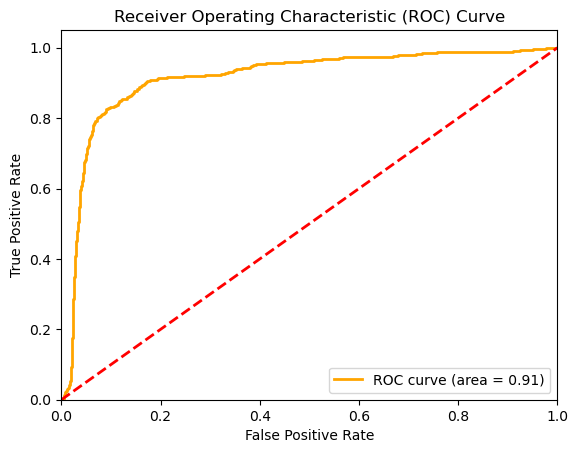

In [11]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred = logreg.decision_function(x1_test)
fpr, tpr, thresholds = roc_curve(y1_test, y_pred)
roc_auc = roc_auc_score(y1_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
# Axix labels,  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Title
plt.title('Receiver Operating Characteristic (ROC) Curve')
#legend
plt.legend(loc="lower right")
plt.show()


## Data balancing in python

In [12]:
#Changing categorical variables to numeric using get_dummies method

df1= pd.get_dummies(data=df, columns=["department", "salary_range", "difference_groups", "satisfaction_groups"])
df1.columns

Index(['satisfaction_level', 'last_evaluation_score', 'project_count',
       'average_monthly_hours', 'years_of_working', 'workplace_accident_count',
       'employment_status', 'promotion_last_5years', 'Difference_in_scores',
       'department_IT', 'department_RandD', 'department_accounting',
       'department_hr', 'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical', 'salary_range_high', 'salary_range_low',
       'salary_range_medium', 'difference_groups_-0.19 - 0',
       'difference_groups_-0.59 - -0.2', 'difference_groups_-1 - -0.6',
       'difference_groups_0 - 0.19', 'difference_groups_0.2 - 0.59',
       'difference_groups_0.6 - 1', 'satisfaction_groups_0-0.2',
       'satisfaction_groups_0.3-0.4', 'satisfaction_groups_0.5-0.6',
       'satisfaction_groups_0.7-0.8', 'satisfaction_groups_0.9-1'],
      dtype='object')

## Method 1 - undersampling 

In [13]:
# Class count
count_class_0, count_class_1 = df.employment_status.value_counts()

# Divide by class
df_class_0 = df1[df1["employment_status"] == 0]
df_class_1 = df1[df1["employment_status"] == 1]

In [14]:
df_class_0.shape, df_class_1.shape

((9285, 33), (1882, 33))

In [15]:
#undersampling the majority class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis = 0 )
print('Random under-sampling:')
print(df_test_under.employment_status.value_counts())

Random under-sampling:
employment_status
0    1882
1    1882
Name: count, dtype: int64


In [16]:
x = df_test_under.drop("employment_status", axis=1)
y = df_test_under["employment_status"]

In [17]:
# modeling
x2_train, x2_test, y2_train, y2_test = train_test_split(x, y, test_size=0.3, random_state=15, stratify=y)
log_under= LogisticRegression()
log_under.fit(x2_train,y2_train)
log_under.score(x2_test,y2_test)

0.868141592920354

In [18]:
print(classification_report(y2_test, log_under.predict(x2_test)))
#precision, recall and F1 _score of class one improved from 0.74, 0.65, 0.69 to 0.87,0.90, 0.89 respecively after performing random undersampling 


              precision    recall  f1-score   support

           0       0.90      0.82      0.86       565
           1       0.84      0.91      0.87       565

    accuracy                           0.87      1130
   macro avg       0.87      0.87      0.87      1130
weighted avg       0.87      0.87      0.87      1130



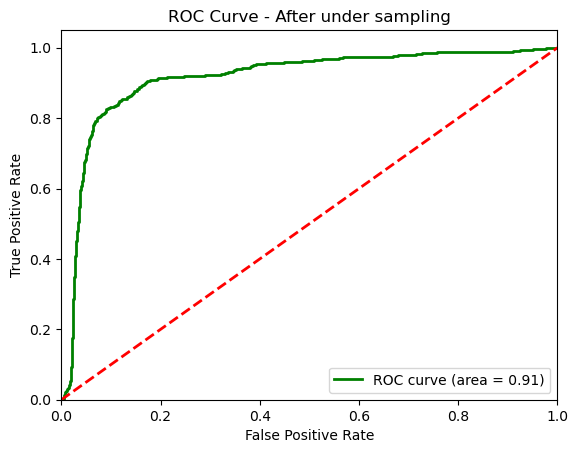

In [19]:
# ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score
y_pred2 = log_under.decision_function(x2_test)
fpr_under, tpr_under, thresholds = roc_curve(y2_test, y_pred2)
roc_auc = roc_auc_score(y2_test, y_pred2)
plt.figure()
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
# Axix labels,  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Title
plt.title('ROC Curve - After under sampling')
#legend
plt.legend(loc="lower right")
plt.show()

# AUC has improved from 91% to 93%

## Method 2 - Oversampling

In [20]:
count_class_0, count_class_1

(9285, 1882)

In [21]:
# oversampling the minority class
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis = 0)
print('Random over-sampling:')
print(df_test_over.employment_status.value_counts())

Random over-sampling:
employment_status
0    9285
1    9285
Name: count, dtype: int64


In [22]:
df_test_over.shape

(18570, 33)

In [23]:
x = df_test_over.drop("employment_status", axis=1)
y = df_test_over["employment_status"]

In [24]:
# modeling
x3_train, x3_test, y3_train, y3_test = train_test_split(x, y, test_size=0.3, random_state=15, stratify=y)

In [25]:
y3_train.value_counts(), y3_test.value_counts()

(employment_status
 1    6500
 0    6499
 Name: count, dtype: int64,
 employment_status
 0    2786
 1    2785
 Name: count, dtype: int64)

In [26]:
log_over = LogisticRegression()
log_over.fit(x3_train,y3_train)
log_over.score(x3_test,y3_test)

0.8709387901633459

In [27]:
print(classification_report(y3_test, log_over.predict(x3_test)))

              precision    recall  f1-score   support

           0       0.89      0.84      0.87      2786
           1       0.85      0.90      0.87      2785

    accuracy                           0.87      5571
   macro avg       0.87      0.87      0.87      5571
weighted avg       0.87      0.87      0.87      5571



In [28]:
#precision, recall and F1 _score of class one improved from 0.74, 0.65, 0.69 to 0.85,0.90, 0.87 respecively after performing random oversampling

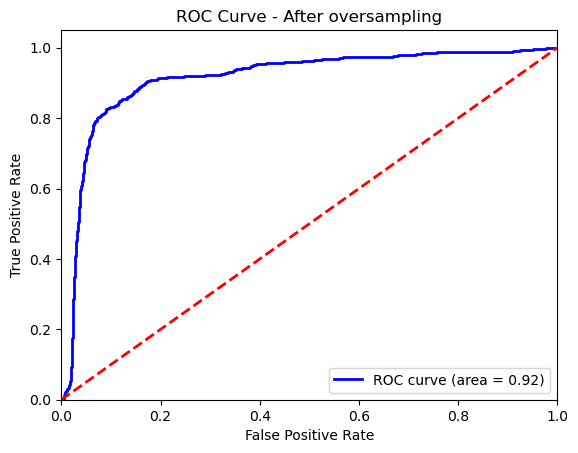

In [29]:
# ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score
y_pred3 = log_over.decision_function(x3_test)
fpr_over, tpr_over, thresholds = roc_curve(y3_test, y_pred3)
roc_auc = roc_auc_score(y3_test, y_pred3)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
# Axix labels,  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Title
plt.title('ROC Curve - After oversampling')
#legend
plt.legend(loc="lower right")
plt.show()

# AUC has improved from 91% to 92%

## Method 3 - SMOTE (Synthetic Minority Oversampling Technique)

In [30]:
X3 = df1.drop("employment_status", axis=1)
Y3 = df1["employment_status"]

In [31]:
Y3.value_counts()

employment_status
0    9285
1    1882
Name: count, dtype: int64

In [32]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, Y_sm = smote.fit_resample(X3, Y3)
Y_sm.value_counts()

employment_status
1    9285
0    9285
Name: count, dtype: int64

In [33]:
x4_train, x4_test, y4_train, y4_test = train_test_split(X_sm, Y_sm, test_size=0.3, random_state=15, stratify=Y_sm)

In [34]:
y4_train.value_counts(), y4_test.value_counts()

(employment_status
 1    6500
 0    6499
 Name: count, dtype: int64,
 employment_status
 0    2786
 1    2785
 Name: count, dtype: int64)

In [35]:
# Modelling 
log_smote = LogisticRegression()
log_smote.fit(x4_train,y4_train)
log_smote.score(x4_test,y4_test)

0.9066594866271764

In [36]:
print(classification_report (y4_test, log_smote.predict(x4_test)))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90      2786
           1       0.89      0.93      0.91      2785

    accuracy                           0.91      5571
   macro avg       0.91      0.91      0.91      5571
weighted avg       0.91      0.91      0.91      5571



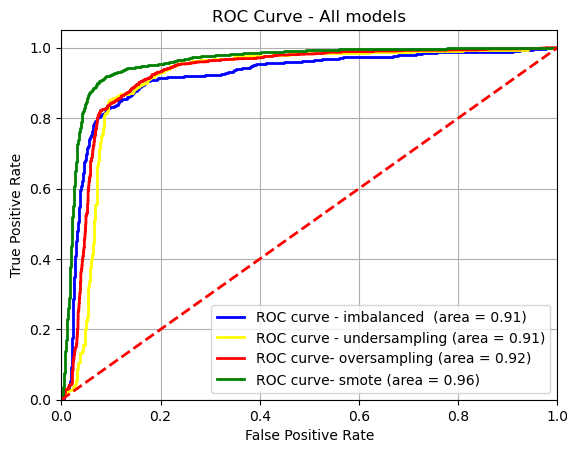

In [37]:
# ROC Curve for all models
from sklearn.metrics import roc_curve, roc_auc_score
# Without balancing
y_pred = logreg.decision_function(x1_test)
fpr_im, tpr_im, thresholds = roc_curve(y1_test, y_pred)
roc_auc1 = roc_auc_score(y1_test, y_pred)

#undersampling 
y_pred2 = log_under.decision_function(x2_test)
fpr_under, tpr_under, thresholds = roc_curve(y2_test, y_pred2)
roc_auc2 = roc_auc_score(y2_test, y_pred2)

# Oversampling
y_pred3 = log_over.decision_function(x3_test)
fpr_over, tpr_over, thresholds = roc_curve(y3_test, y_pred3)
roc_auc3 = roc_auc_score(y3_test, y_pred3)

#smote
y_pred4 = log_smote.decision_function(x4_test)
fpr_smote, tpr_smote, thresholds = roc_curve(y4_test, y_pred4)
roc_auc4 = roc_auc_score(y4_test, y_pred4)

plt.figure()
plt.plot(fpr_im, tpr_im, color='blue', lw=2, label=f'ROC curve - imbalanced  (area = {roc_auc1:.2f})')
plt.plot(fpr_under, tpr_under, color='yellow', lw=2, label=f'ROC curve - undersampling (area = {roc_auc2:.2f})')
plt.plot(fpr_over, tpr_over, color='red', lw=2, label=f'ROC curve- oversampling (area = {roc_auc3:.2f})')
plt.plot(fpr_smote, tpr_smote, color='green', lw=2, label=f'ROC curve- smote (area = {roc_auc4:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
# Axix labels,  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Title
plt.title('ROC Curve - All models')
#legend
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


## Feature selection - Wrapper Methods
## 1 - Recursive fearure Elimination

In [38]:

from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
# Preparing the data
X3 = df1.drop("employment_status", axis=1)
Y3 = df1["employment_status"]

# SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, Y_sm = smote.fit_resample(X3, Y3)

# Splitting the data
x4_train, x4_test, y4_train, y4_test = train_test_split(X_sm, Y_sm, test_size=0.3, random_state=15, stratify=Y_sm)

# Standardizing the data
scaler = StandardScaler()
x4_train_std = scaler.fit_transform(x4_train)
x4_test_std = scaler.transform(x4_test)

# Performing RFE
logit_r = LogisticRegression(solver='liblinear', random_state=123)
rfe = RFE(estimator=logit_r, 
          n_features_to_select=15, 
          step=1)
rfe.fit(x4_train_std, y4_train)

# Displaying the selected features
selected_features = df1.columns.drop("employment_status")[rfe.support_]
print("Selected features:", selected_features)

Selected features: Index(['satisfaction_level', 'years_of_working', 'department_IT',
       'department_accounting', 'department_sales', 'department_support',
       'department_technical', 'salary_range_low', 'salary_range_medium',
       'difference_groups_0 - 0.19', 'satisfaction_groups_0-0.2',
       'satisfaction_groups_0.3-0.4', 'satisfaction_groups_0.5-0.6',
       'satisfaction_groups_0.7-0.8', 'satisfaction_groups_0.9-1'],
      dtype='object')


## 2 - Permutation Feature importance

In [39]:
#!pip install mlxtend

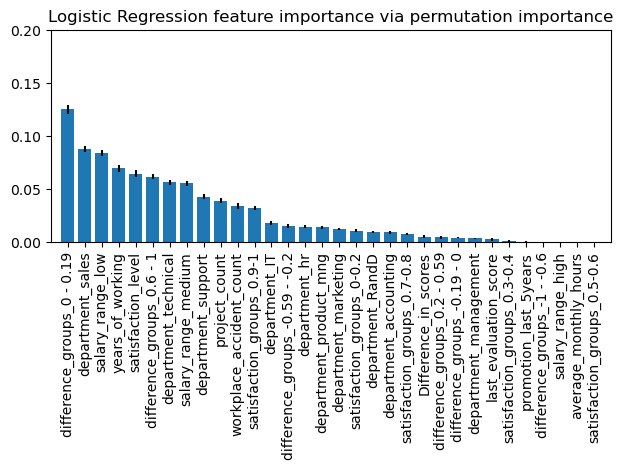

In [40]:

from mlxtend.evaluate import feature_importance_permutation
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Preparing the data
X3 = df1.drop("employment_status", axis=1)
Y3 = df1["employment_status"]

# Applying SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, Y_sm = smote.fit_resample(X3, Y3)

# Splitting the data
x4_train, x4_test, y4_train, y4_test = train_test_split(X_sm, Y_sm, test_size=0.3, random_state=15, stratify=Y_sm)

# Training the Logistic Regression model
log_smote = LogisticRegression()
log_smote.fit(x4_train, y4_train)

# Converting DataFrames to numpy arrays for permutation importance
x4_test_np = x4_test.values
y4_test_np = y4_test.values

# Calculating permutation importance
imp_vals, imp_all = feature_importance_permutation(
    predict_method=log_smote.predict, 
    X=x4_test_np,
    y=y4_test_np,
    metric='accuracy',
    num_rounds=50,
    seed=0)

# Calculating standard deviation and sorting indices
std = np.std(imp_all, axis=1)
indices = np.argsort(imp_vals)[::-1]

# Plotting the feature importances
plt.figure()
plt.title("Logistic Regression feature importance via permutation importance")
plt.bar(range(x4_train.shape[1]), imp_vals[indices], yerr=std[indices])
plt.xticks(range(x4_train.shape[1]), X3.columns[indices], rotation=90)
plt.xlim([-1, x4_train.shape[1]])
plt.ylim([0, 0.2])
plt.tight_layout()
plt.savefig('permutation_importance_smote.pdf')
plt.show()

## 3 - Sequential Feature selection

## Foward Feature selection

In [41]:
# Performing Sequential Feature Selection - Foward selection
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs_foward = SFS(logit_r, 
           k_features=15, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           n_jobs=-1,
           cv=5)

sfs_foward = sfs_foward.fit(x4_train_std, y4_train)

# Displaying the selected features
selected_features = X3.columns[list(sfs_foward.k_feature_idx_)]
print("Selected features:", selected_features)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:   11.9s finished

[2024-06-08 16:26:38] Features: 1/15 -- score: 0.7442877438067896[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    1.5s finished

[2024-06-08 16:26:40] Features: 2/15 -- score: 0.8851457661230651[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.0s finished

[2024-06-08 16:26:42] Features: 3/15 -- score: 0.8910689614348714[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:    3.1s finished

[2024-06-08 16:26:46] Features: 4/15 -- score: 0.8922229851718116[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    3.5s finished



Selected features: Index(['satisfaction_level', 'years_of_working', 'workplace_accident_count',
       'promotion_last_5years', 'department_RandD', 'department_accounting',
       'department_hr', 'department_management', 'department_product_mng',
       'department_technical', 'salary_range_medium',
       'difference_groups_-0.59 - -0.2', 'difference_groups_-1 - -0.6',
       'satisfaction_groups_0.7-0.8', 'satisfaction_groups_0.9-1'],
      dtype='object')


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    5.5s finished

[2024-06-08 16:27:42] Features: 15/15 -- score: 0.8899151152810252

## Backward Feature Selection

In [42]:
# Performing Sequential Feature Selection - Backward selection

#sfs_backward = SFS(logit_r, 
          # k_features=15, 
           #forward=False, 
           #floating=False, 
           #verbose=2,
           #scoring='accuracy',
          # n_jobs=-1,
           #cv=5)

#sfs_backward = sfs_backward.fit(x4_train_std, y4_train)

# Displaying the selected features
#selected_features = X3.columns[list(sfs_backward.k_feature_idx_)]
#print("Selected features:", selected_features)

## Bi-directional

In [43]:
# Performing Sequential Feature Selection - Backward selection

#sfs_bi = SFS(logit_r, 
          # k_features=15, 
           #forward=False, 
           #floating=True, 
           #verbose=2,
           #scoring='accuracy',
           #n_jobs=-1,
          # cv=5)

#sfs_bi = sfs_bi.fit(x4_train_std, y4_train)

# Displaying the selected features
#selected_features = X3.columns[list(sfs_bi.k_feature_idx_)]
#print("Selected features:", selected_features)

## 2 Embedded feature Selection Methods

# Lasso method

In [44]:

# Preparing the data
X3 = df1.drop("employment_status", axis=1)
Y3 = df1["employment_status"]

# Applying SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, Y_sm = smote.fit_resample(X3, Y3)

# Splitting the data
x4_train, x4_test, y4_train, y4_test = train_test_split(X_sm, Y_sm, test_size=0.3, random_state=15, stratify=Y_sm)

# Standardizing the data
sc = StandardScaler()
x4_train_std = sc.fit_transform(x4_train)
x4_test_std = sc.transform(x4_test)

# Defining and training the logistic regression model
log_smote = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', multi_class='ovr', random_state=123)
log_smote.fit(x4_train_std, y4_train)

# Evaluating the model
print('Training accuracy:', log_smote.score(x4_train_std, y4_train))
print('Test accuracy:', log_smote.score(x4_test_std, y4_test))

# Displaying model parameters
print('Intercept:', log_smote.intercept_)
np.set_printoptions(precision=8)
print('Coefficients:', log_smote.coef_)




Training accuracy: 0.9412262481729364
Test accuracy: 0.939867169269431
Intercept: [0.74974343]
Coefficients: [[-2.28573178 -0.14211905 -1.01370456  0.30023127  1.31635269 -0.58679696
  -0.0985959   0.          2.09702552  1.59077043  1.73787382  1.71010325
   1.2124096   1.73850877  1.70555796  3.58553579  2.7946388   3.11662608
   0.97734703  3.17953542  2.94153182  1.84927262  0.84673102  0.
   3.75766547  1.26143745  2.35786954  1.80588366  1.8472364   2.25785848
   2.32462808  3.17903695]]


In [45]:
#getting the names of the most important features
from sklearn.feature_selection import SelectFromModel
log_smote = SelectFromModel(LogisticRegression(penalty='l1', C=2.0, solver='liblinear', multi_class='ovr', random_state=123), max_features=15)
log_smote.fit(x4_train_std, y4_train)
selected_features_indices = log_smote.get_support()
selected_features_names = X3.columns[selected_features_indices]
print(selected_features_names)

Index(['satisfaction_level', 'department_IT', 'department_sales',
       'department_support', 'department_technical', 'salary_range_low',
       'salary_range_medium', 'difference_groups_-0.19 - 0',
       'difference_groups_0 - 0.19', 'difference_groups_0.6 - 1',
       'satisfaction_groups_0-0.2', 'satisfaction_groups_0.3-0.4',
       'satisfaction_groups_0.5-0.6', 'satisfaction_groups_0.7-0.8',
       'satisfaction_groups_0.9-1'],
      dtype='object')


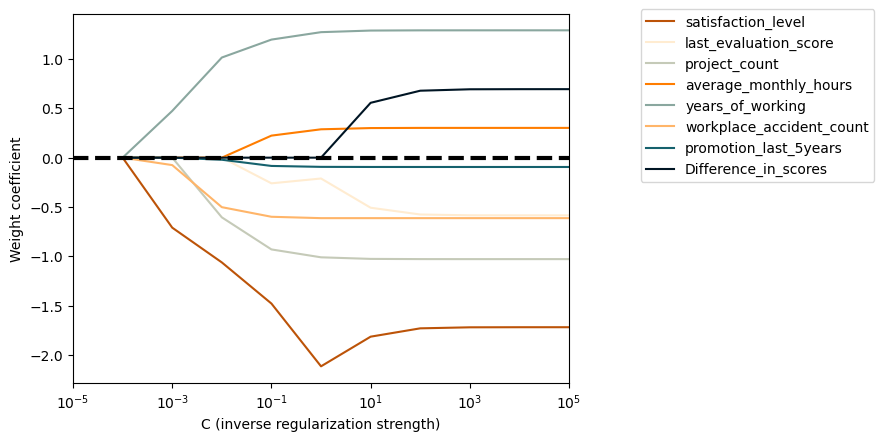

In [46]:
# Lasso path
X3 = df1.drop("employment_status", axis=1)
Y3 = df1["employment_status"]
smote = SMOTE(sampling_strategy='minority')
X_sm, Y_sm = smote.fit_resample(X3, Y3)
x4_train, x4_test, y4_train, y4_test = train_test_split(X_sm, Y_sm, test_size=0.3, random_state=15, stratify=Y_sm)

# Standardizing the data
sc = StandardScaler()
x4_train_std = sc.fit_transform(x4_train)
x4_test_std = sc.transform(x4_test)

# Plotting the effect of regularization
fig = plt.figure()
ax = plt.subplot(111)

colors = colors

weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', 
                            C=10.**c, 
                            solver='liblinear', 
                            multi_class='ovr', 
                            random_state=0)
    lr.fit(x4_train_std, y4_train)
    weights.append(lr.coef_[0])  
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=X3.columns[column],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('Weight coefficient')
plt.xlabel('C (inverse regularization strength)')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
plt.savefig('lasso-path.pdf', dpi=300, 
            bbox_inches='tight', pad_inches=0.2)
plt.show()

## Hyperparameter tuning

In [47]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

# I am using smote to balance the data
X3 = df1.drop("employment_status", axis=1)
Y3 = df1["employment_status"]

# Applying SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, Y_sm = smote.fit_resample(X3, Y3)

# Splitting the data
x4_train, x4_test, y4_train, y4_test = train_test_split(X_sm, Y_sm, test_size=0.3, random_state=15, stratify=Y_sm)

# Creating the pipeline
pipe_logistic = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression())
# Training the model
pipe_logistic.fit(x4_train, y4_train)

# Predicting the target for the test data
y_pred = pipe_logistic.predict(x4_test)

# Calculating the test accuracy
test_acc = pipe_logistic.score(x4_test, y4_test)
print(f'Test accuracy: {test_acc:.3f}')

Test accuracy: 0.733


##   Cross validation using StratifiedKFold

In [48]:
# cv - using cross_val_score Function 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=pipe_logistic,
                         X=x4_train,
                         y=y4_train,
                         cv=10,
                         n_jobs=1)
#Accuracy score
print(f'CV accuracy scores: {scores}')
# mean and standard deviation of the CV accuracy scores
print(f'CV accuracy: {np.mean(scores):.3f} '
      f'+/- {np.std(scores):.3f}')

CV accuracy scores: [0.74076923 0.73384615 0.72615385 0.73307692 0.69923077 0.73153846
 0.73076923 0.73076923 0.74       0.7582756 ]
CV accuracy: 0.732 +/- 0.014


## Validation curve

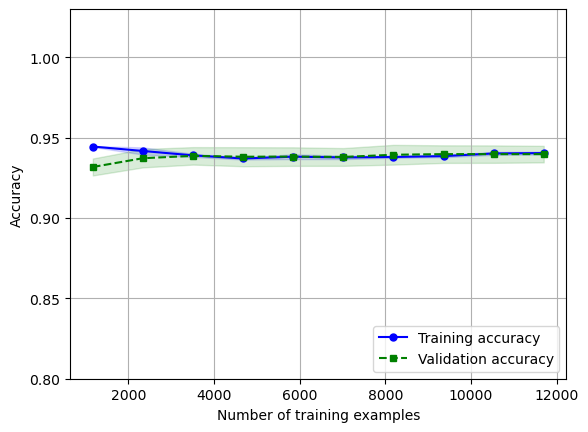

In [49]:
from sklearn.model_selection import learning_curve
pipe_logistic = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2', max_iter=10000))
# Compute learning curve data
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_logistic,
                                                        X=x4_train,
                                                        y=y4_train,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        cv=10,
                                                        n_jobs=1)

# Calculate mean and standard deviation for training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')


plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.show()

## Grid search hyperparameter tuning

In [50]:
from sklearn.model_selection import GridSearchCV
pipe_logit = make_pipeline(StandardScaler(),
                        LogisticRegression(max_iter=10000, random_state=1))

# Define the parameter grid
param_grid = {'logisticregression__C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],
              'logisticregression__penalty': ['l1', 'l2']}

# Perform grid search
gs = GridSearchCV(estimator=pipe_logit,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10,
                  refit=True,
                  n_jobs=-1)
gs = gs.fit(x4_train, y4_train)
print(gs.best_score_)

0.9404575116953868


In [51]:
# Perfomamce
clf = gs.best_estimator_
clf.fit(x4_train, y4_train)
print(f'Test accuracy: {clf.score(x4_test, y4_test):.3f}')

Test accuracy: 0.940


## Nested cross validation

In [52]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [53]:
# partitioning and balancing the data
X3 = df1.drop("employment_status", axis=1)
Y3 = df1["employment_status"]
smote = SMOTE(sampling_strategy='minority')
X_sm, Y_sm = smote.fit_resample(X3, Y3)
x4_train, x4_test, y4_train, y4_test = train_test_split(X_sm, Y_sm, test_size=0.3, random_state=15, stratify=Y_sm)

# logistic regression pipeline
pipe_logit = make_pipeline(StandardScaler(), LogisticRegression(max_iter=10000, random_state=1))

# SVM pipeline
pipe_svm = make_pipeline(StandardScaler(), SVC(random_state=1))

# Decision Tree pipeline
pipe_dt = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=1))

# Random Forest pipeline
pipe_rf = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1))

# logistic regression parameter grid
param_grid_logit = [{'logisticregression__C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],
                     'logisticregression__penalty': ['l1', 'l2'],
                     'logisticregression__solver': ['liblinear']}]

# Parameter grid for SVM
param_grid_svm = [{'svc__C': [0.01, 0.1, 1, 10, 100],
                   'svc__kernel': ['linear', 'rbf']}]

# Parameter grid for Decision Tree
param_grid_dt = [{'decisiontreeclassifier__max_depth': [1, 2, 3, 4, 5, 6, 7, None]}]

# Parameter grid for Random Forest
param_grid_rf = [{'randomforestclassifier__n_estimators': [10, 50, 100, 200],
                  'randomforestclassifier__criterion': ['gini', 'entropy'],
                  'randomforestclassifier__max_depth': [None, 2, 4, 6, 8, 10]}]

# GridSearchCV for each model
gs_logit = GridSearchCV(estimator=pipe_logit, param_grid=param_grid_logit, scoring='accuracy', cv=2, n_jobs=-1)
gs_svm = GridSearchCV(estimator=pipe_svm, param_grid=param_grid_svm, scoring='accuracy', cv=2, n_jobs=-1)
gs_dt = GridSearchCV(estimator=pipe_dt, param_grid=param_grid_dt, scoring='accuracy', cv=2, n_jobs=-1)
gs_rf = GridSearchCV(estimator=pipe_rf, param_grid=param_grid_rf, scoring='accuracy', cv=2, n_jobs=-1)

# Nested cross-validation for each model
scores_logit = cross_val_score(gs_logit, x4_train, y4_train, scoring='accuracy', cv=5)
scores_svm = cross_val_score(gs_svm, x4_train, y4_train, scoring='accuracy', cv=5)
scores_dt = cross_val_score(gs_dt, x4_train, y4_train, scoring='accuracy', cv=5)
scores_rf = cross_val_score(gs_rf, x4_train, y4_train, scoring='accuracy', cv=5)

# nested cross-validation results
print(f'Logistic Regression Accuracy: {np.mean(scores_logit):.3f} +/- {np.std(scores_logit):.3f}')
print(f'SVM Accuracy: {np.mean(scores_svm):.3f} +/- {np.std(scores_svm):.3f}')
print(f'Decision Tree Accuracy: {np.mean(scores_dt):.3f} +/- {np.std(scores_dt):.3f}')
print(f'Random Forest Accuracy: {np.mean(scores_rf):.3f} +/- {np.std(scores_rf):.3f}')

Logistic Regression Accuracy: 0.940 +/- 0.004
SVM Accuracy: 0.979 +/- 0.001
Decision Tree Accuracy: 0.973 +/- 0.003
Random Forest Accuracy: 0.985 +/- 0.002


In [54]:
#determining the models accuracy on test data
gs_logit.fit(x4_train, y4_train)
gs_svm.fit(x4_train, y4_train)
gs_dt.fit(x4_train, y4_train)
gs_rf.fit(x4_train, y4_train)

# Predictions on the test data
y_pred_logit = gs_logit.predict(x4_test)
y_pred_svm = gs_svm.predict(x4_test)
y_pred_dt = gs_dt.predict(x4_test)
y_pred_rf = gs_rf.predict(x4_test)

# Accuracy on the test data
test_score_logit = accuracy_score(y4_test, y_pred_logit)
test_score_svm = accuracy_score(y4_test, y_pred_svm)
test_score_dt = accuracy_score(y4_test, y_pred_dt)
test_score_rf = accuracy_score(y4_test, y_pred_rf)

# Test score results
print(f'Logistic Regression Test Accuracy: {test_score_logit:.3f}')
print(f'SVM Test Accuracy: {test_score_svm:.3f}')
print(f'Decision Tree Test Accuracy: {test_score_dt:.3f}')
print(f'Random Forest Test Accuracy: {test_score_rf:.3f}')

Logistic Regression Test Accuracy: 0.938
SVM Test Accuracy: 0.978
Decision Tree Test Accuracy: 0.973
Random Forest Test Accuracy: 0.983


## Ensemble learning -  Majority Voting

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd

X3 = df1.drop("employment_status", axis=1)
Y3 = df1["employment_status"]
smote = SMOTE(sampling_strategy='minority', random_state=1)
X_sm, Y_sm = smote.fit_resample(X3, Y3)
x4_train, x4_test, y4_train, y4_test = train_test_split(X_sm, Y_sm, test_size=0.3, random_state=15, stratify=Y_sm)

# Defining classifiers
clf_logit = LogisticRegression(penalty='l2', C=0.001, solver='lbfgs', max_iter=10000, random_state=1)
clf_dt = DecisionTreeClassifier(max_depth=1, criterion='entropy', random_state=0)
clf_knn = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')
clf_rf = RandomForestClassifier(n_estimators=100, random_state=1)
clf_svm = SVC(C=1.0, kernel='linear', probability=True, random_state=1)
#pipelines
pipe_logit = Pipeline([('sc', StandardScaler()), ('clf', clf_logit)])
pipe_knn = Pipeline([('sc', StandardScaler()), ('clf', clf_knn)])
pipe_rf = Pipeline([('sc', StandardScaler()), ('clf', clf_rf)])
pipe_svm = Pipeline([('sc', StandardScaler()), ('clf', clf_svm)])

# Cross-validation for each model
clf_labels = ['Logistic Regression', 'Decision Tree', 'KNN', 'Random Forest', 'SVM']
print('10-fold cross validation:\n')
for clf, label in zip([pipe_logit, clf_dt, pipe_knn, pipe_rf, pipe_svm], clf_labels):
    scores = cross_val_score(estimator=clf, X=x4_train, y=y4_train, cv=10, scoring='roc_auc')
    print(f'ROC AUC: {scores.mean():.2f} (+/- {scores.std():.2f}) [{label}]')

# Majority Voting Classifier
mv_clf = VotingClassifier(estimators=[('logit', pipe_logit), 
                                      ('dt', clf_dt), 
                                      ('knn', pipe_knn), 
                                      ('rf', pipe_rf), 
                                      ('svm', pipe_svm)], 
                                      voting='soft')

# Adding the Majority Voting Classifier to the list of classifiers
clf_labels += ['Majority Voting']
all_clf = [pipe_logit, clf_dt, pipe_knn, pipe_rf, pipe_svm, mv_clf]

# Cross-validation for Majority Voting Classifier
for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf, 
                             X=x4_train, 
                             y=y4_train, 
                             cv=10, 
                             scoring='roc_auc')
    print(f'ROC AUC: {scores.mean():.2f} ' 
          f'(+/- {scores.std():.2f}) [{label}]')



10-fold cross validation:

ROC AUC: 0.95 (+/- 0.01) [Logistic Regression]
ROC AUC: 0.80 (+/- 0.01) [Decision Tree]
ROC AUC: 0.96 (+/- 0.00) [KNN]
ROC AUC: 1.00 (+/- 0.00) [Random Forest]
ROC AUC: 0.98 (+/- 0.00) [SVM]
ROC AUC: 0.95 (+/- 0.01) [Logistic Regression]
ROC AUC: 0.80 (+/- 0.01) [Decision Tree]
ROC AUC: 0.96 (+/- 0.00) [KNN]
ROC AUC: 1.00 (+/- 0.00) [Random Forest]
ROC AUC: 0.98 (+/- 0.00) [SVM]
ROC AUC: 0.99 (+/- 0.00) [Majority Voting]


# Perfomance on the test data

In [57]:
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report

# Fit the majority voting classifier to the training data
mv_clf.fit(x4_train, y4_train)

# Predict probabilities and labels on the test set
y_pred_proba = mv_clf.predict_proba(x4_test)[:, 1]  
y_pred = mv_clf.predict(x4_test) 

#ROC AUC score
roc_auc = roc_auc_score(y4_test, y_pred_proba)

# Accuracy
accuracy = accuracy_score(y4_test, y_pred)

# confusion matrix
conf_matrix = confusion_matrix(y4_test, y_pred)

# classification report
class_report = classification_report(y4_test, y_pred)

#  performance metrics
print(f'ROC AUC Score: {roc_auc:.2f}')
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

ROC AUC Score: 0.99
Accuracy: 0.96
Confusion Matrix:
[[2674  112]
 [  85 2700]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      2786
           1       0.96      0.97      0.96      2785

    accuracy                           0.96      5571
   macro avg       0.96      0.96      0.96      5571
weighted avg       0.96      0.96      0.96      5571



## Ensemble learning - Badding

In [ ]:

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report

X3 = df1.drop("employment_status", axis=1)  
Y3 = df1["employment_status"] 
smote = SMOTE(sampling_strategy='minority', random_state=1)
X_sm, Y_sm = smote.fit_resample(X3, Y3)

x4_train, x4_test, y4_train, y4_test = train_test_split(X_sm, Y_sm, test_size=0.3, random_state=15, stratify=Y_sm)

# Decision tree
tree = DecisionTreeClassifier(criterion='entropy', 
                              random_state=1, 
                              max_depth=None)
#Bagging classifier
bag = BaggingClassifier(estimator=tree,
                        n_estimators=10,
                        max_samples=1.0,
                        max_features=1.0,
                        bootstrap=True,
                        random_state=1)


bag.fit(x4_train, y4_train)
y_pred_proba = bag.predict_proba(x4_test)[:, 1] 
y_pred = bag.predict(x4_test)  

#cofirming the accuracy
roc_auc = roc_auc_score(y4_test, y_pred_proba)
accuracy = accuracy_score(y4_test, y_pred)

# confusion matrix
conf_matrix = confusion_matrix(y4_test, y_pred)

# Generate classification report
class_report = classification_report(y4_test, y_pred)
print(f'ROC AUC Score: {roc_auc:.2f}')
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)